<a href="https://colab.research.google.com/github/mffg1993/TurbulentOptics/blob/main/TurbulentWeirdStuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install aotools

     |████████████████████████████████| 57 kB 5.0 MB/s 
  Created wheel for aotools: filename=aotools-1.0.5-py3-none-any.whl size=41951 sha256=f421893b8cbe115d398e545ae4fca9a0f41c128c7c1e6ca1fd75a0f9ed1102f9
  Stored in directory: /root/.cache/pip/wheels/46/58/62/904476584bbe4b1f6b817f123f8a1e334002e5c9861c5f28d9
Successfully built aotools


In [ ]:
from aotools.turbulence.infinitephasescreen import PhaseScreenKolmogorov

nx_size=128
D=8
px_size=D/nx_size
r0=0.164
L0=100
stencil_length_factor =32
phase=PhaseScreenKolmogorov(nx_size,px_size,r0,L0,stencil_length_factor)

In [ ]:
import aotools.turbulence.phasescreen as phh

D = 2; # length of one side of square phase screen [m]
r0 = 0.001; # coherence diameter [m]
N = 256; # number of grid points per side
L0 = 100; # outer scale [m]
l0 = 0.01; # inner scale [m]
delta = D/N

kk=phh.ft_phase_screen(r0,N,delta,L0,l0)

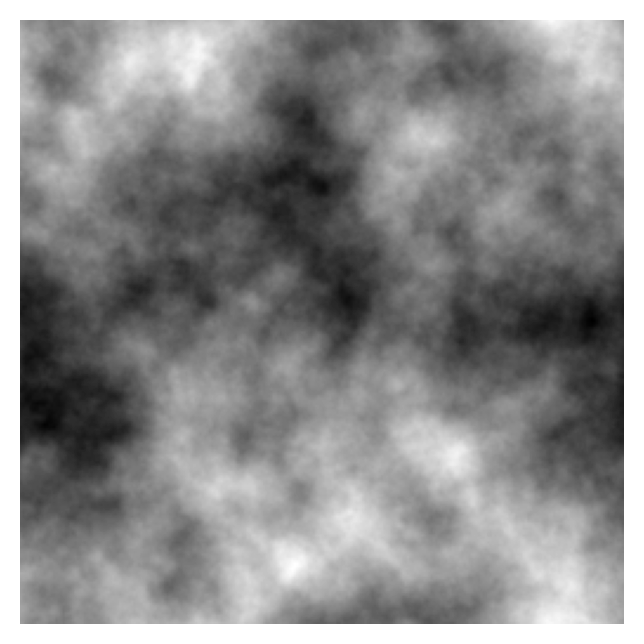

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4),dpi=200)
plt.imshow(kk,cmap='gray')
plt.axis('off')
#plt.colorbar()
plt.show()

In [ ]:
def ft_phase_screen(r0, N, delta, L0, l0, FFT=None, seed=None):
    """
    Creates a random phase screen with Von Karmen statistics.
    (Schmidt 2010)

    Parameters:
        r0 (float): r0 parameter of scrn in metres
        N (int): Size of phase scrn in pxls
        delta (float): size in Metres of each pxl
        L0 (float): Size of outer-scale in metres
        l0 (float): inner scale in metres

    Returns:
        ndarray: numpy array representing phase screen
    """
    delta = float(delta)
    r0 = float(r0)
    L0 = float(L0)
    l0 = float(l0)

    R = random.SystemRandom(time.time())
    if seed is None:
        seed = int(R.random()*100000)
    numpy.random.seed(seed)

    del_f = 1./(N*delta)

    fx = numpy.arange(-N/2., N/2.) * del_f

    (fx, fy) = numpy.meshgrid(fx,fx)
    f = numpy.sqrt(fx**2. + fy**2.)

    fm = 5.92/l0/(2*numpy.pi)
    f0 = 1./L0

    PSD_phi = (0.023*r0**(-5./3.) * numpy.exp(-1*((f/fm)**2)) / (((f**2) + (f0**2))**(11./6)))

    PSD_phi[int(N/2), int(N/2)] = 0

    cn = ((numpy.random.normal(size=(N, N))+1j * numpy.random.normal(size=(N, N))) * numpy.sqrt(PSD_phi)*del_f)

    phs = ift2(cn, 1, FFT).real

    return phs



def ift2(G, delta_f, FFT=None):
    """
    Wrapper for inverse fourier transform

    Parameters:
        G: data to transform
        delta_f: pixel seperation
        FFT (FFT object, optional): An accelerated FFT object
    """

    N = G.shape[0]

    if FFT:
        g = numpy.fft.fftshift(FFT(numpy.fft.fftshift(G))) * (N * delta_f) ** 2
    else:
        g = fft.ifftshift(fft.ifft2(fft.fftshift(G))) * (N * delta_f) ** 2

    return g